In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding Data

In [4]:
bike = pd.read_csv('day.csv')

In [5]:
bike.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Dictionary

Given dataset have the following fields:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

In [9]:
bikefinal = bike.copy()
bikefinal.drop_duplicates(subset=None, inplace=True)

print(bike.shape)
print(bikefinal.shape)

(730, 16)
(730, 16)


#### Hence we can say there are no duplicates in the data set we have

# Data Cleaning

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

instant : Its only an index value

dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

We will save the new dataframe, so that the original dataset is preserved for any future analysis/validation

### Dropping instant , casual , registered and Date columns

In [10]:
bikefinal.drop(columns=['registered','casual','instant','dteday'],inplace=True)

In [11]:
bikefinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [12]:
round(100*(bikefinal.isnull().sum()/len(bikefinal)), 2)

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

In [13]:
bikefinal.shape

(730, 12)

Convert these to their respective meanings, based on the data dictionary 
- 1:spring
- 2:summer
- 3:fall
- 4:winter

In [14]:
bikefinal.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [15]:
bikefinal.season = bikefinal.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
bikefinal.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [16]:
bikefinal.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

Convert these to their respective meanings, based on the data dictionary 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

And in the value counts we can see that there are only three values and not four, lets make them to Clear,Mist,Rainy

In [17]:
bikefinal.weathersit = bikefinal.weathersit.map({1:"Clear", 2:"Mist", 3:"Rainy"})
bikefinal.weathersit.head()

0     Mist
1     Mist
2    Clear
3    Clear
4    Clear
Name: weathersit, dtype: object

In [18]:
bikefinal.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

We have exactly two years data which are 365 days each. Lets not drop this column as it makes sense to see the trend across two years(0=2018 , 1= 2019)

In [19]:
bikefinal.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


##### Weekday
- We are not dropping ```weekday``` keeping in mind that monday to sunday has an increasing trend. Its better being numerical!
- We also see that this column can be rearranged to make more sense. 
- 01-01-2018 was a Monday but the weekday is marked as 6 instead of 2 as its the second day of the week.
- Instead we can go srom ```Sunday``` to ```Saturday``` with numbers ranging from ```1``` to ```7```

In [20]:
bikefinal.weekday = bikefinal.weekday.map({0:3,1:4,2:5,3:6,4:7,5:1,6:2})
bikefinal.weekday.head()

0    2
1    3
2    4
3    5
4    6
Name: weekday, dtype: int64

In [21]:
bikefinal.shape

(730, 12)

## Basic Visualisation

In [22]:
independent_variables = list(set(list(bikefinal.columns)) - set(['cnt']))
dependent_variables = ["cnt"]

### All the below interpretations are using median data

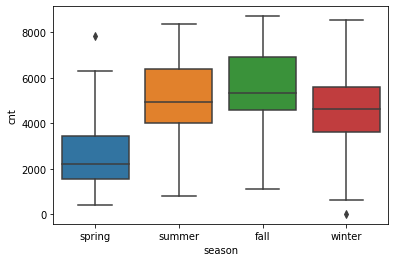

In [23]:
sns.boxplot(x = 'season', y = 'cnt', data = bikefinal)
plt.show()

#### We can see that during spring there are very less number of riders and more during summer and fall

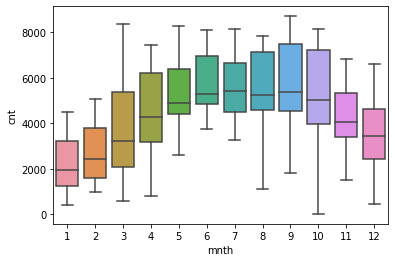

In [24]:
sns.boxplot(x = 'mnth', y = 'cnt', data = bikefinal)
plt.show()

#### When looked month wise we see a kind of increasing trend till July and then decreases towards the year end. this might be due to high work season in the mid of the year.

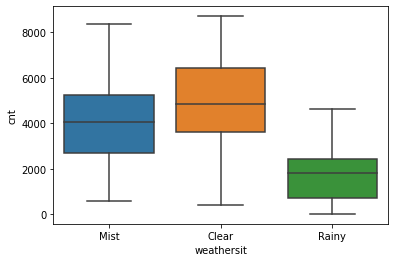

In [25]:
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikefinal)
plt.show()

#### If the weather situation is rainy we see a lot of less usage of the bikes

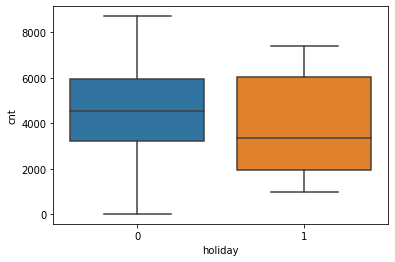

In [26]:
sns.boxplot(x = 'holiday', y = 'cnt', data = bikefinal)
plt.show()

#### we see High usage on a non-holiday than a holiday, maybe due to high commute to works

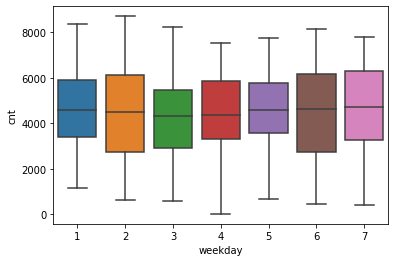

In [27]:
sns.boxplot(x = 'weekday', y = 'cnt', data = bikefinal)
plt.show()

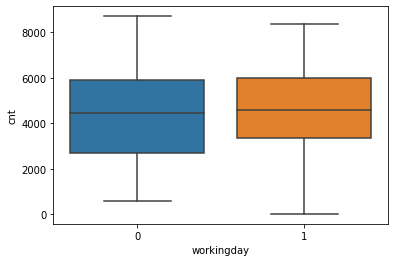

In [27]:
sns.boxplot(x = 'workingday', y = 'cnt', data = bikefinal)
plt.show()

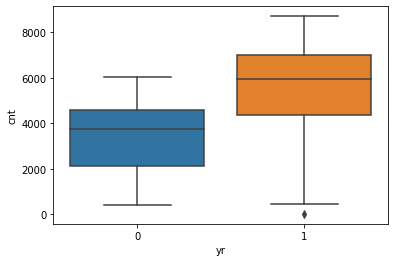

In [28]:
sns.boxplot(x = 'yr', y = 'cnt', data = bikefinal)
plt.show()

####  We see there are a lot of riders during 2019 compared to 2018

In [29]:
independent_variables

['weathersit',
 'temp',
 'hum',
 'yr',
 'workingday',
 'season',
 'holiday',
 'mnth',
 'atemp',
 'windspeed',
 'weekday']

<Figure size 720x720 with 0 Axes>

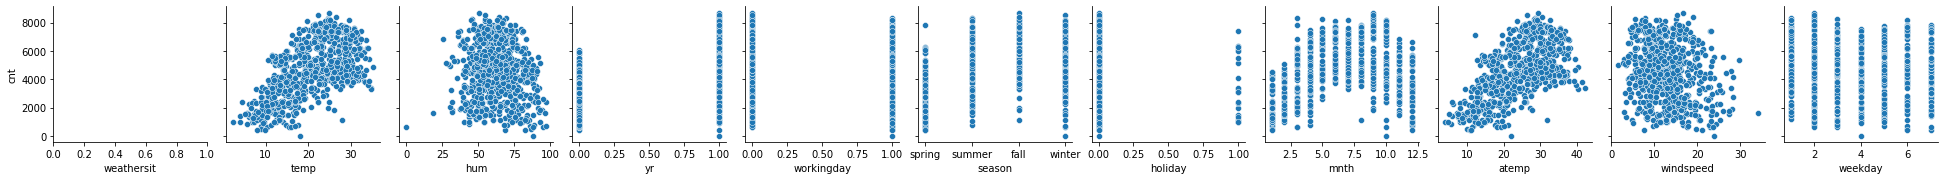

In [30]:
### Lets plot a pair plot of cnt with all the other variables
plt.figure(figsize=(10,10))
sns.pairplot(data = bikefinal,x_vars=independent_variables,y_vars=dependent_variables)
plt.show()

#### Based on the above pair plots
- we can say that we can expect a linear realtion of ```cnt``` with ```atemp```,  ```temp``` 
- we can see that ```windspeed```,```hum``` have kind of more diversely scattered plot with ```cnt```
- all the other variables are more categorical in nature

## Also look below bivariate graphs

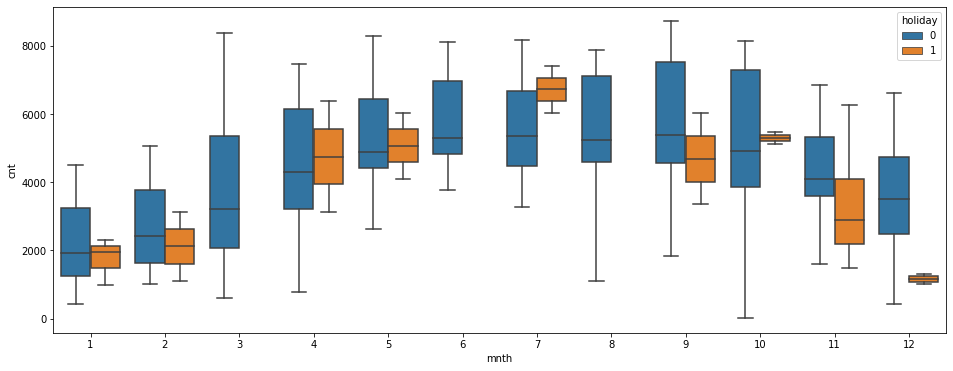

In [31]:
## Lets see affect of holiday in each month towards rider count
plt.figure(figsize = (16, 6))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'holiday', data = bikefinal)
plt.show()

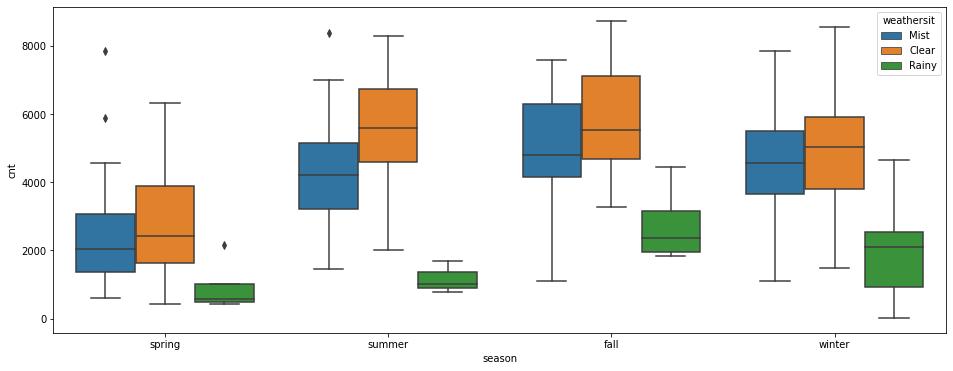

In [32]:
## Lets see cnt in each weather situation in each season
plt.figure(figsize = (16, 6))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = bikefinal)
plt.show()

## Bivariate analysis based on above plots:
   - We see that across all the seasons, if we observe a rainy weather situation, then riders are less
   - Usually across most of the months the median number of riders are around the same irrespective of holiday or not. But in the month of JULY people tend to drive more on holidays.
   - In the month of December we observe very less riders if there are holidays.

# Data Preparation

#### Creating Dummy variables for weathersit variable

In [33]:
bikefinal.weathersit.value_counts()

Clear    463
Mist     246
Rainy     21
Name: weathersit, dtype: int64

In [34]:
weather_dummies = pd.get_dummies(bikefinal.weathersit , drop_first=True)
weather_dummies.head()

,Mist,Rainy
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [35]:
bikefinal = bikefinal.drop(columns=['weathersit'])

#### Creating Dummy variables for season variable

In [36]:
bikefinal.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [37]:
season_dummies = pd.get_dummies(bikefinal.season,drop_first=True)
season_dummies.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [38]:
## Lets drop season, as we donot need it 
bikefinal = bikefinal.drop(columns=['season'])

#### Creating Dummy variables for month variable

In [39]:
bikefinal.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [40]:
## lets rename the values to respective month names
bikefinal.mnth = bikefinal.mnth.map({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})
mnth_dummies = pd.get_dummies(bikefinal.mnth,drop_first=True)
mnth_dummies.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [41]:
bikefinal = bikefinal.drop(columns=['mnth'])

#### Creating Dummy variables for weekday variable

In [42]:
bikefinal.weekday.value_counts()

4    105
3    105
2    105
7    104
5    104
1    104
6    103
Name: weekday, dtype: int64

In [43]:
## lets rename the values to respective weekday names
bikefinal.weekday = bikefinal.weekday.map({1:"Sunday",2:"Monday",3:"Tuesday",4:"Wednesday",5:"Thursday",6:"Friday",7:"Saturday"})

In [44]:
weekday_dummies = pd.get_dummies(bikefinal.weekday,drop_first=True)
bikefinal = bikefinal.drop(columns=['weekday'])
weekday_dummies.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


## Concatinating all dummy variables into our dataframe

In [45]:
bikefinal = pd.concat([bikefinal,weather_dummies,season_dummies,mnth_dummies,weekday_dummies],axis=1)
bikefinal.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mist,Rainy,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Drop dteday variable as the variables month, yr also describes this with strong correlation

In [46]:
bikefinal.shape

(730, 30)

##### Importing all required libraries

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Train-Test Split

In [48]:
# setting the seed so that train and test data set always have the same rows, respectively
np.random.seed(0)

# lets split train:test as 70% to 30%
bikefinal_train, bikefinal_test = train_test_split(bikefinal, train_size = 0.7, test_size = 0.3, random_state = 100)

In [49]:
bikefinal_train.shape

(510, 30)

In [50]:
bikefinal_test.shape

(219, 30)

In [51]:
scaler = MinMaxScaler()
## the below are list of variables which we want to scale
features_to_scale = ["temp","atemp","hum","windspeed","cnt"]

## fit_transform: learn the min max values and apply on these columns
bikefinal_train[features_to_scale] = scaler.fit_transform(bikefinal_train[features_to_scale])

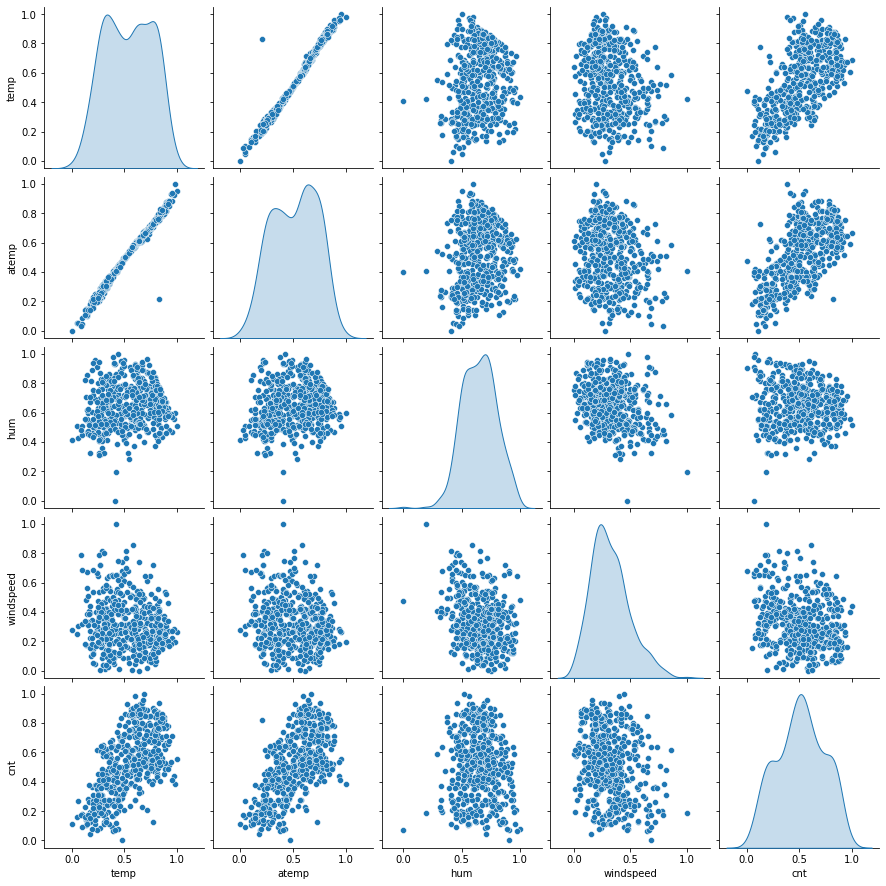

In [52]:
sns.pairplot(bikefinal_train[features_to_scale], diag_kind='kde')
plt.show()

### The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

In [53]:
bikefinal_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mist,Rainy,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,1,0,0,0,0,0


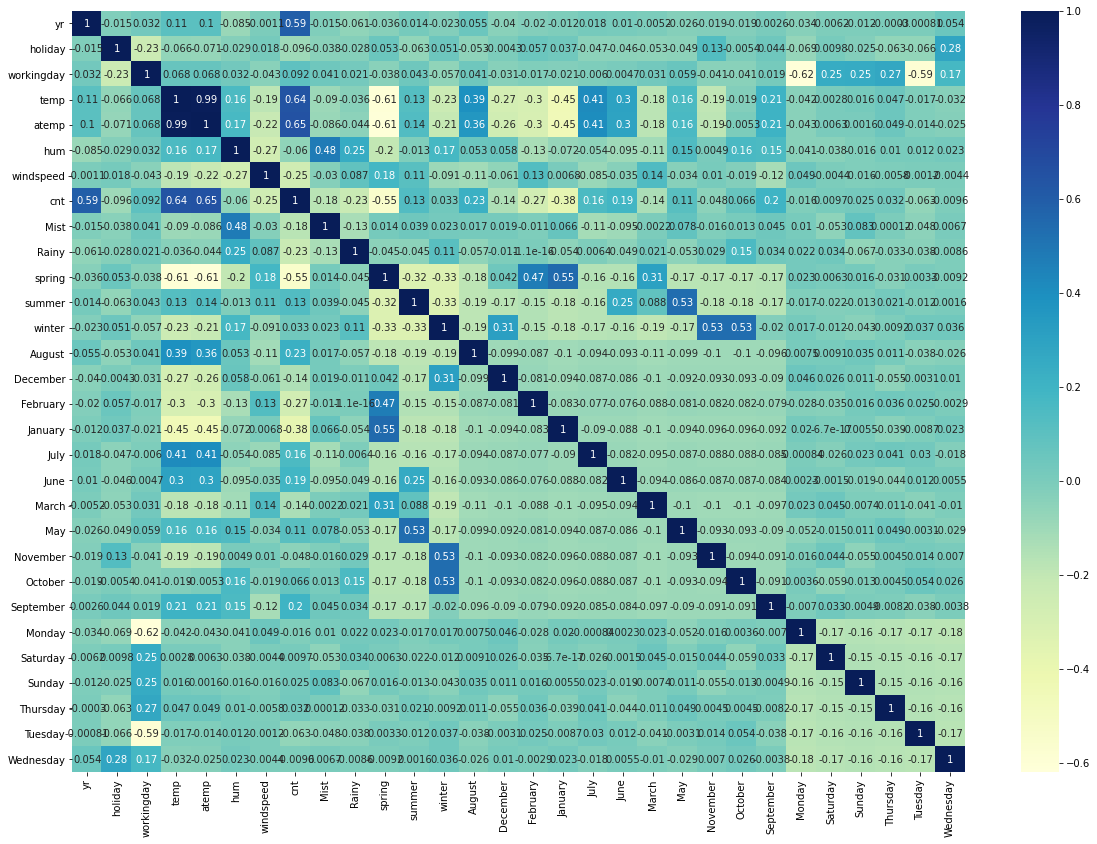

In [54]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 14))
sns.heatmap(bikefinal_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### After rescaling, we observe that:

- ```yr``` ,  ```temp```,  ```atemp``` are having approximately around 0.6 with cnt
- ```temp```  and  ```atemp``` are 99% correlated with each other, not dropping one of them now, as VIF will eliminate it if necessary.
- ```spring``` and ```January``` are negatively correlated with ```cnt``` and many more implications we can get

# Building Model

In [55]:
y_train = bikefinal_train.pop('cnt')
X_train = bikefinal_train

In [56]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   Mist        510 non-null    uint8  
 8   Rainy       510 non-null    uint8  
 9   spring      510 non-null    uint8  
 10  summer      510 non-null    uint8  
 11  winter      510 non-null    uint8  
 12  August      510 non-null    uint8  
 13  December    510 non-null    uint8  
 14  February    510 non-null    uint8  
 15  January     510 non-null    uint8  
 16  July        510 non-null    uint8  
 17  June        510 non-null    uint8  
 18  March       510 non-null    uint8  
 19  May         510 non-null    

## We can determine features and check the model performance. Let's use RFE to extract the features and check further from beginning

In [57]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE with 20 features selected
rfe = rfe.fit(X_train, y_train)

In [58]:
ranks = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
ranks_df = pd.DataFrame(ranks, columns =['Variable', 'Support', 'Rank'])
ranks_df.sort_values("Rank")

,Variable,Support,Rank
0,yr,True,1
23,Monday,True,1
22,September,True,1
20,November,True,1
19,May,True,1
16,July,True,1
15,January,True,1
13,December,True,1
11,winter,True,1
10,summer,True,1


In [59]:
rfe_selected = X_train.columns[rfe.support_]
list(rfe_selected)

['yr',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'Mist',
 'Rainy',
 'spring',
 'summer',
 'winter',
 'December',
 'February',
 'January',
 'July',
 'May',
 'November',
 'September',
 'Monday']

In [60]:
rfe_notSelected = X_train.columns[~rfe.support_]
list(rfe_notSelected)

['August',
 'June',
 'March',
 'October',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday']

#### We have the top 20 features that we wanna use in our model

In [61]:
import statsmodels.api as sm

In [62]:
X_train_rfe = X_train[rfe_selected]

X_train_rfe = sm.add_constant(X_train_rfe)

## running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [63]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.94e-188
Time:                        08:03:16   Log-Likelihood:                 526.26
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     489   BIC:                            -921.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2987      0.038      7.768      0.000       0.223       0.374
yr             0.2317      0.008     29.121      0.000       0.216       0.247
holiday       -0.0489      0.027     -1.816      0.070      -0.102       0.004
workingday     0.0442      0.011      3.865      0.000       0.022       0.067
temp           0.4261      0.133      3.195      0.001       0.164       0.688
atemp          0.0253      0.135      0.187      0.852      -0.240       0.290
hum           -0.1525      0.038     -4.055      0.000      -0.226      -0.079
windspeed     -0.1859      0.026     -7.181      0.000      -0.237      -0.135
Mist          -0.0599      0.010     -5.794      0.000      -0.080      -0.040
Rainy         -0.2560      0.026     -9.798      0.000      -0.307      -0.205
spring        -0.0566      0.022     -2.561      0.011      -0.100      -0.013
summer         0.0263      0.017      1.526      0.128      -0.008       0.060
winter         0.1005      0.018      5.564      0.000       0.065       0.136
December      -0.0507      0.018     -2.807      0.005      -0.086      -0.015
February      -0.0354      0.021     -1.659      0.098      -0.077       0.007
January       -0.0657      0.021     -3.100      0.002      -0.107      -0.024
July          -0.0514      0.018     -2.861      0.004      -0.087      -0.016
May            0.0251      0.017      1.453      0.147      -0.009       0.059
November      -0.0484      0.019     -2.592      0.010      -0.085      -0.012
September      0.0715      0.017      4.298      0.000       0.039       0.104
Monday         0.0547      0.014      3.794      0.000       0.026       0.083
==============================================================================
Omnibus:                       84.497   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.277
Skew:                          -0.794   Prob(JB):                     2.46e-53
Kurtosis:                       5.979   Cond. No.                         86.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lets look at the VIF scores to decide on that varaible following the below methodology of elimination
- High p-value(less significant) and High VIF (remove it)
- High-low:
    - High P and Low VIF: remove these first and build a new model
    - Low P and High VIF: remove after the ones above
- Low p and Low VIF (significant and not correlated, so keep them)

#### The criteria order in which I have to select a feature for removal
- 1.High vif , High p
- 2.High p , low vif
- 3.Low p, High vif

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,97.27
4,temp,59.58
5,atemp,53.94
10,spring,5.90
12,winter,4.02
11,summer,3.62
15,January,2.38
6,hum,1.98
3,workingday,1.88
14,February,1.87


In [65]:
X_train_rfe = X_train_rfe.drop(columns=["atemp"])

In [66]:
X_train_rfe = sm.add_constant(X_train_rfe)

## running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.59e-189
Time:                        08:03:55   Log-Likelihood:                 526.24
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2985      0.038      7.774      0.0

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,97.15
9,spring,5.79
4,temp,4.88
11,winter,3.88
10,summer,3.49
14,January,2.38
5,hum,1.97
3,workingday,1.88
13,February,1.87
17,November,1.81


In [69]:
X_train_rfe = X_train_rfe.drop(columns=["May"])

In [70]:
X_train_rfe = sm.add_constant(X_train_rfe)

## running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          3.55e-190
Time:                        08:04:55   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2873      0.038      7.630      0.0

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,93.23
9,spring,5.69
4,temp,4.73
11,winter,3.84
10,summer,2.81
14,January,2.37
5,hum,1.94
3,workingday,1.88
13,February,1.86
16,November,1.80


In [72]:
X_train_rfe = X_train_rfe.drop(columns=["February"])

In [73]:
X_train_rfe = sm.add_constant(X_train_rfe)

## running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          9.55e-191
Time:                        08:09:22   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2759      0.037      7.452      0.0

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,89.86
9,spring,5.27
4,temp,4.43
11,winter,3.83
10,summer,2.76
5,hum,1.94
3,workingday,1.88
17,Monday,1.79
15,November,1.76
13,January,1.68


In [75]:
X_train_rfe = X_train_rfe.drop(columns=["holiday"])

In [76]:
X_train_rfe = sm.add_constant(X_train_rfe)

## running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          4.53e-191
Time:                        08:12:34   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2694      0.037      7.286      0.0

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,89.12
8,spring,5.26
3,temp,4.42
10,winter,3.83
9,summer,2.76
4,hum,1.94
14,November,1.73
12,January,1.68
2,workingday,1.66
16,Monday,1.65


In [78]:
X_train_rfe = X_train_rfe.drop(columns=["spring"])

In [79]:
X_train_rfe = sm.add_constant(X_train_rfe)

## running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     182.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.78e-190
Time:                        08:14:00   Log-Likelihood:                 517.30
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     494   BIC:                            -934.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2036      0.030      6.787      0.0

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.71
3,temp,2.33
9,winter,2.08
4,hum,1.92
13,November,1.68
11,January,1.67
2,workingday,1.65
15,Monday,1.65
6,Mist,1.57
10,December,1.48


In [81]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       510 non-null    float64
 1   yr          510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   hum         510 non-null    float64
 5   windspeed   510 non-null    float64
 6   Mist        510 non-null    uint8  
 7   Rainy       510 non-null    uint8  
 8   summer      510 non-null    uint8  
 9   winter      510 non-null    uint8  
 10  December    510 non-null    uint8  
 11  January     510 non-null    uint8  
 12  July        510 non-null    uint8  
 13  November    510 non-null    uint8  
 14  September   510 non-null    uint8  
 15  Monday      510 non-null    uint8  
dtypes: float64(4), int64(2), uint8(10)
memory usage: 32.9 KB


In [82]:
list(vif.Features)

['const',
 'temp',
 'winter',
 'hum',
 'November',
 'January',
 'workingday',
 'Monday',
 'Mist',
 'December',
 'summer',
 'July',
 'Rainy',
 'September',
 'windspeed',
 'yr']

# Residual Analysis and Prediction

In [83]:
## lets predict on the train data
y_train_pred = lm.predict(X_train_rfe)

In [84]:
train_error_series = pd.Series(y_train-y_train_pred)
train_error_series.head()

653    0.107502
576    0.102649
426   -0.065804
728   -0.118873
482   -0.129096
dtype: float64

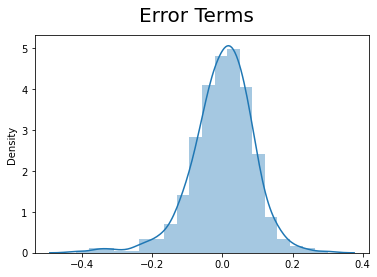

In [85]:
fig = plt.figure()
sns.distplot(train_error_series, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)   
plt.show()

In [86]:
## Using the previous scaler on the train data, lets apply the learnt min max values on test set
bikefinal_test[features_to_scale] = scaler.transform(bikefinal_test[features_to_scale])
bikefinal_test[features_to_scale].head()

,temp,atemp,hum,windspeed,cnt
184,0.831783,0.769660,0.657364,0.084219,0.692706
535,0.901354,0.842587,0.610133,0.153728,0.712034
299,0.511964,0.496145,0.837699,0.334206,0.303382
221,0.881625,0.795343,0.437098,0.339570,0.547400
152,0.817246,0.741471,0.314298,0.537414,0.569029


In [87]:
y_test = bikefinal_test.pop('cnt')
X_test = bikefinal_test

In [88]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

# Creating X_test_rfe dataframe by dropping variables from X_test and using the chosen features
X_test_rfe = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)

In [89]:
y_test_pred = lm.predict(X_test_rfe)
y_test_pred.head()

184    0.441156
535    0.925643
299    0.423545
221    0.604006
152    0.621240
dtype: float64

In [90]:
#checking the r2 value
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8104202435274624

In [91]:
r2_score(y_true = y_train , y_pred = y_train_pred)

0.8470444646108528

Text(0, 0.5, 'y_test_pred')

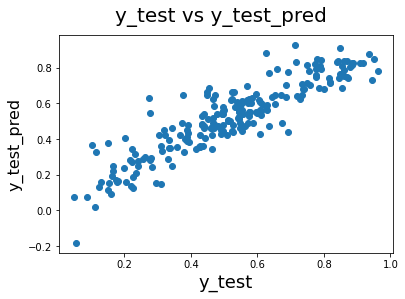

In [92]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)         # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                     # Y-label

In [93]:
## lets look at the final coefficients
lm.params.to_frame().sort_values(0)

,0
Rainy,-0.250386
windspeed,-0.196672
hum,-0.158102
Mist,-0.056684
January,-0.050774
July,-0.041274
November,-0.036386
December,-0.035426
workingday,0.052962
Monday,0.063454


# Summary

- We can clearly see that only 15 features were selected over 30 features after doing some feature engineering.
- See the above cell for list of final features 
- The Final Model has an Adjusted R2 of **```0.842```** which performed on the test set with an R2 score of **```0.847```**
- The r2_score for the model on test set , we got a value of **```0.81```**

### Feature Wise importance:
- The following variables have negative impact on the final model, as we can see the lm coefficient params
- <b> Rainy, windspeed , hum , mist , nov ans Dec(maybe due to holiday seasons)</b>
- **20%** negative impact is due to the **windspeed** 
-  **15%** negative impact is due to the **hum** 
- In the year **2019**, we could see around **23% increase** in the count of the riders.